In [6]:
import os
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt

# Caminhos para as pastas do dataset
dataset_path = 'PK/PKLot/PKLot/PUCPR/Cloudy/2012-09-12'
images_path = os.path.join(dataset_path, 'images')  # Todas as imagens
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Configuração do modelo SAM
model_type = "vit_h"  # Tipo do modelo SAM
sam_checkpoint = 'sam_vit_h_4b8939.pth'  # Caminho para o checkpoint do modelo SAM
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)


In [3]:
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter para RGB
    return image

def detect_vehicles_sam(image_path):
    image = load_image(image_path)
    predictor.set_image(image)

    # Realizar a previsão de segmentação
    masks, scores, logits = predictor.predict()

    # Criar uma imagem em branco para a máscara de veículos detectados
    vehicle_mask = np.zeros_like(image[:, :, 0])

    # Iterar sobre todas as máscaras detectadas e somá-las na máscara final
    for mask in masks:
        vehicle_mask[mask > 0] = 255

    return image, vehicle_mask


In [4]:
def visualize_detection(image, vehicle_mask):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Imagem Original')

    plt.subplot(1, 2, 2)
    plt.imshow(vehicle_mask, cmap='gray')
    plt.title('Máscara de Veículos Detectados')

    plt.show()


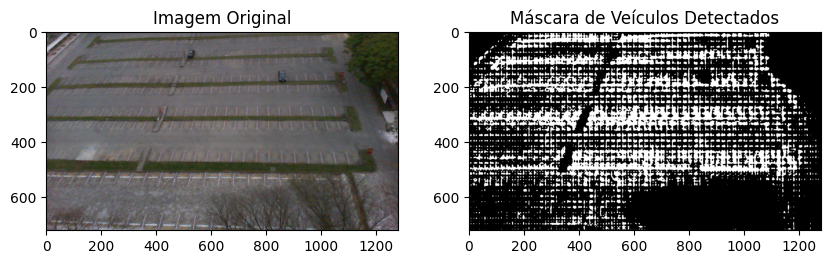

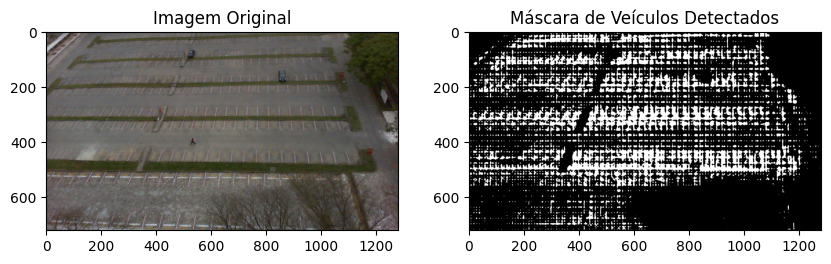

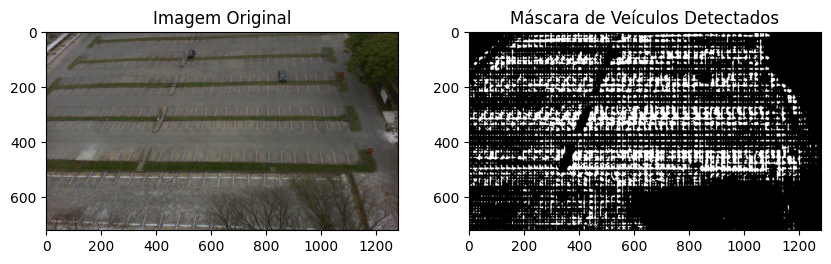

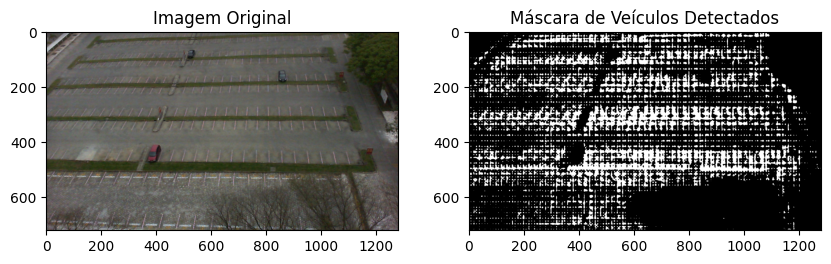

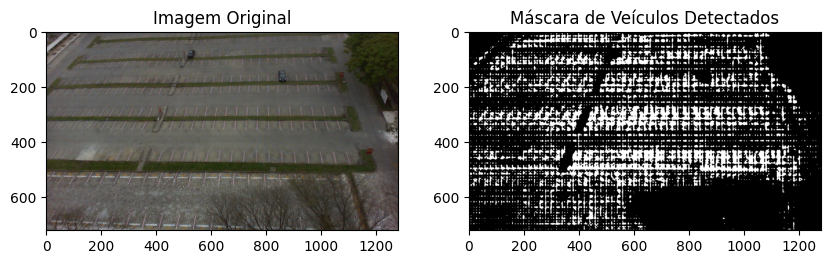

In [8]:
test_images = os.listdir(images_path)

# Testar o modelo SAM em algumas imagens de teste
for image_name in test_images[:5]:  # Visualizar as 5 primeiras imagens
    image_path = os.path.join(images_path, image_name)
    image, vehicle_mask = detect_vehicles_sam(image_path)
    visualize_detection(image, vehicle_mask)
